## Task 1b: Build a logistic regression model 

#### Used given Logistic Regression model to plot the graph

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [252]:
data = pd.read_csv('student_data.csv')

In [254]:
hours_studied = data['Hours_Studied'].values
review_session = data['Review_Session'].values
result = data['Results'].values 

In [256]:
def logistic_function(z):
    return 1 / (1 + np.exp(-z))

In [258]:
def log_odds(hours_studied, review_session):
    return -3 + 0.8 * hours_studied + 1.5 * review_session

In [260]:
log_odds_values = log_odds(hours_studied, review_session)
probabilities = logistic_function(log_odds_values)

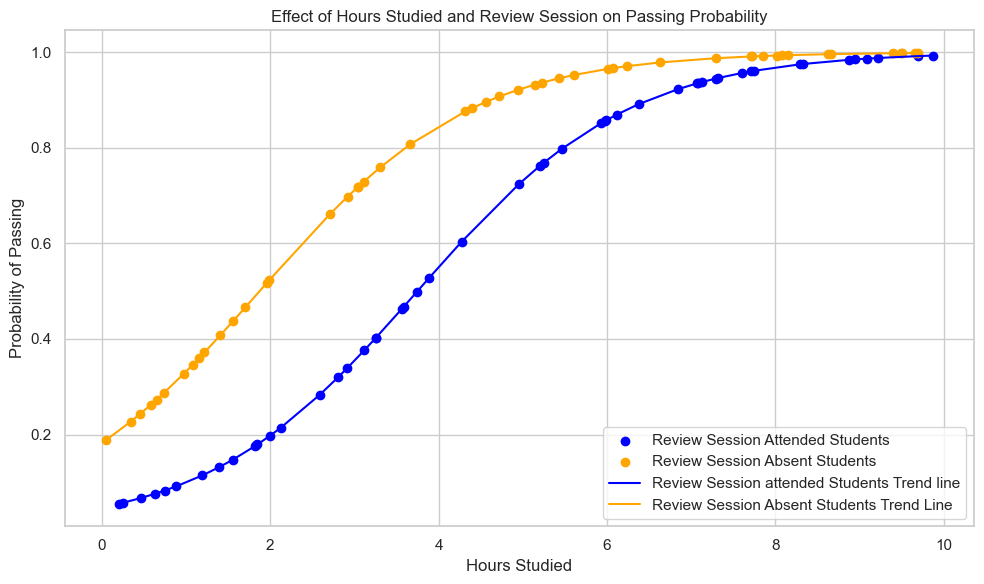

In [262]:
plt.figure(figsize=(10,6))

plt.scatter(hours_studied[review_session == 0], probabilities[review_session == 0], label='Review Session Attended Students', color='blue')
plt.scatter(hours_studied[review_session == 1], probabilities[review_session == 1], label='Review Session Absent Students', color='orange')

plt.plot(np.sort(hours_studied[review_session == 0]), np.sort(probabilities[review_session == 0]), color='blue', label='Review Session attended Students Trend line')
plt.plot(np.sort(hours_studied[review_session == 1]), np.sort(probabilities[review_session == 1]), color='orange', label='Review Session Absent Students Trend Line')

plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Effect of Hours Studied and Review Session on Passing Probability')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

#### For output model coefficients and performance metrics used inbuilt LogisticRegression model

Model Coefficients: [[1.36542016 1.87797591]]
Intercept: [-4.61373892]
Accuracy: 0.93
Accuracy: 0.93
AUC: 0.9761029411764706


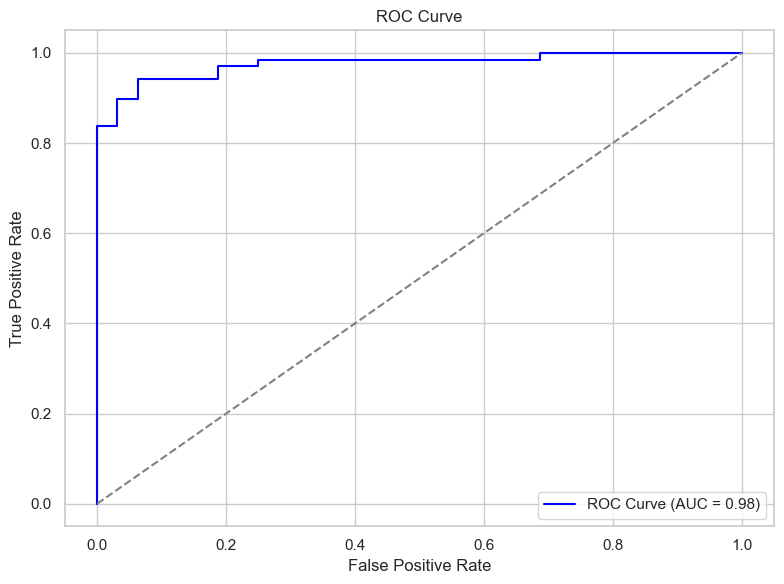

In [265]:
X = np.column_stack((hours_studied, review_session))
y = result

model = LogisticRegression()
model.fit(X, y)

print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

probabilities = model.predict_proba(X)[:, 1]
predictions = model.predict(X)

accuracy = accuracy_score(y, predictions)
print("Accuracy:", accuracy)

accuracy = accuracy_score(y, predictions)
print("Accuracy:", accuracy)

auc = roc_auc_score(y, probabilities)
print("AUC:", auc)

fpr, tpr, _ = roc_curve(y, probabilities)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Task 2:  Understanding and Prevent Overfitting in the context of SVM 

### 1) Linear kernel

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [271]:
data = pd.read_csv('student_data.csv')

In [273]:
hours_studied = data['Hours_Studied'].values
review_session = data['Review_Session'].values
result = data['Results'].values 

In [275]:
def logistic_function(z):
    return 1 / (1 + np.exp(-z))

In [277]:
def log_odds(hours_studied, review_session):
    return -3 + 0.8 * hours_studied + 1.5 * review_session

In [279]:
log_odds_values = log_odds(hours_studied, review_session)
probabilities = logistic_function(log_odds_values)

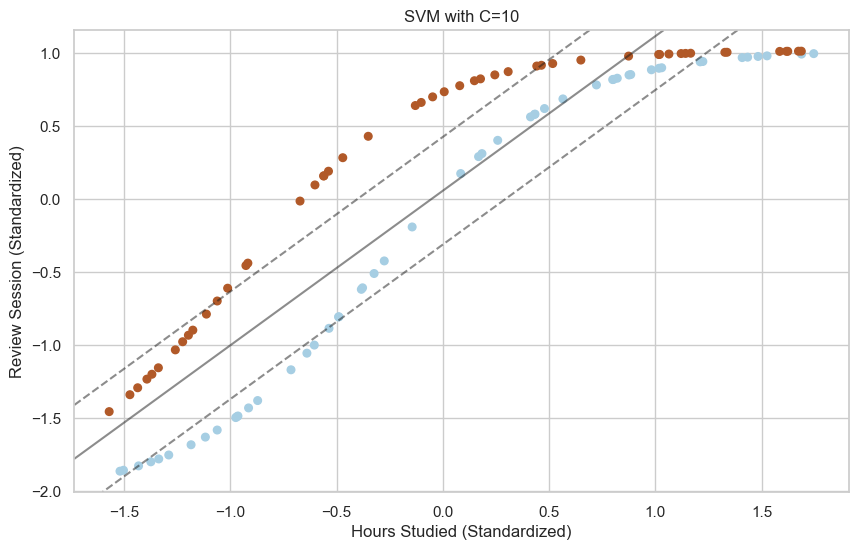

In [290]:
X = [[x, y] for x, y in zip(hours_studied, probabilities)]
y = data['Review_Session'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C_value = 10
model = SVC(kernel='linear', C=C_value).fit(X_scaled, y)

def plot_decision_function(model, ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 50)
    yy = np.linspace(ylim[0], ylim[1], 50)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 1], alpha=0.5, linestyles='dashed')
    
    return ax

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=30, cmap=plt.cm.Paired)

ax = plot_decision_function(model, ax)

ax.set_title(f'SVM with C={C_value}')
ax.set_xlabel('Hours Studied (Standardized)')
ax.set_ylabel('Review Session (Standardized)')

plt.show()


## 2) RBF kernel

Best gamma value: 59.800000000000004


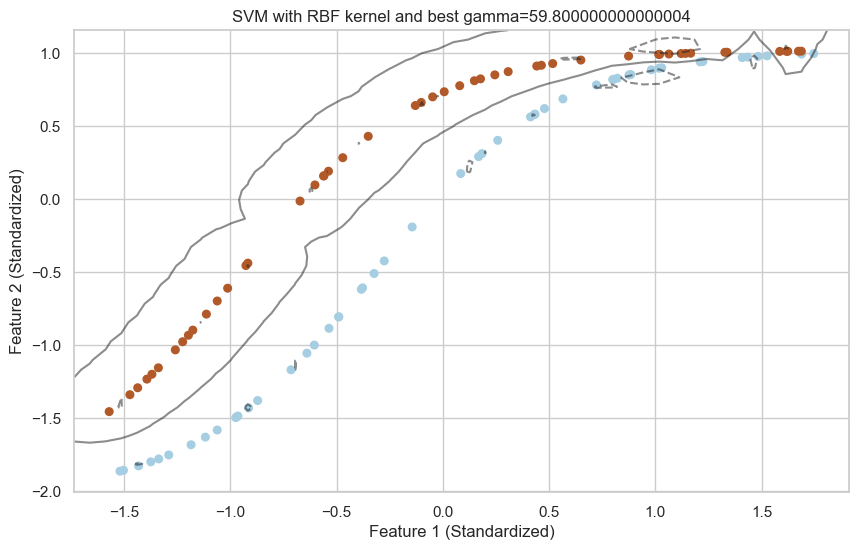

In [284]:
param_grid = {'gamma': [g for g in np.arange(0.1, 100, 0.1)]}

svm = SVC(kernel='rbf')

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(svm, param_grid, cv=cv)

grid_search.fit(X_scaled, y)

best_model = grid_search.best_estimator_
best_gamma = grid_search.best_params_['gamma']

print(f"Best gamma value: {best_gamma}")

def plot_decision_function(model, ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 50)
    yy = np.linspace(ylim[0], ylim[1], 50)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 1], alpha=0.5, linestyles='dashed')
    
    return ax

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=30, cmap=plt.cm.Paired)

ax = plot_decision_function(best_model, ax)

ax.set_title(f'SVM with RBF kernel and best gamma={best_gamma}')
ax.set_xlabel('Feature 1 (Standardized)')
ax.set_ylabel('Feature 2 (Standardized)')

plt.show()